In [1]:
import os
from pathlib import Path
import pandas as pd

data_path = "../data/sims/"

files = [Path(data_path)/f for f in os.listdir(data_path) if f.startswith("acoustic_results_subj")]
dfs = []
for f in files:
    dfs.append(pd.read_csv(f))
df = pd.concat(dfs)
df = df.reset_index(drop=True)
df.sample(5)

,Row,sub_id,skin,skull,brain,brain_inner,targetL,targetR,ROItarget_L_max,ROItarget_R_max,ROItarget_L_avg,ROItarget_R_avg
4,intensity__L+z--r+z_R+z--r+z,3,19.52882,11.794010,16.35306,16.35306,3.320811,13.415800,10.56139,15.322520,5.021967,5.588408
7,intensity__L+z--l+z_R+z--l+z,4,21.19572,17.660320,23.47113,23.47113,1.154417,8.854377,20.28820,14.189170,7.680821,5.862836
3,intensity__L+z--l+z_R+z--l+z,2,22.63493,15.657000,14.29079,14.29079,4.879295,8.803300,13.16484,10.918560,5.682749,3.997168
5,intensity__L+z--l+z_R+z--l+z,3,23.66219,13.559020,14.84136,14.84136,2.329479,12.704540,13.43144,14.701980,6.405791,5.491197
1,intensity__L+z--l+z_R+z--l+z,1,14.15246,7.649818,11.98485,11.98485,7.426672,2.879171,11.98485,6.952676,4.285328,3.309752


In [2]:
# clean the data: add more rows & make sure everything is balanced

# add variable if 0 (bilateral), target left (-1), target right (1)
import re

def get_dir(s):
    if bool(re.search(r"L.*--l.*R.*--r", s)): return "bilateral"
    if bool(re.search(r"L.*--l.*R.*--l", s)): return "unilateral left"
    if bool(re.search(r"L.*--r.*R.*--r", s)): return "unilateral right"
    return 999

df["dir"] = [get_dir(s) for s in df["Row"]]
df.sample(5)

,Row,sub_id,skin,skull,brain,brain_inner,targetL,targetR,ROItarget_L_max,ROItarget_R_max,ROItarget_L_avg,ROItarget_R_avg,dir
5,intensity__L+z--l+z_R+z--l+z,3,23.66219,13.55902,14.84136,14.84136,2.329479,12.704540,13.43144,14.70198,6.405791,5.491197,unilateral left
7,intensity__L+z--l+z_R+z--l+z,4,21.19572,17.66032,23.47113,23.47113,1.154417,8.854377,20.28820,14.18917,7.680821,5.862836,unilateral left
11,intensity__L--l_R--l_test_parallel_no_controll...,6,70.82358,50.91821,45.80240,45.80240,13.918980,10.607380,44.68842,32.48597,20.071880,15.322580,unilateral left
2,intensity__L+z--r+z_R+z--r+z,2,22.69590,11.86342,17.73161,17.73161,3.920369,13.749070,11.69581,16.04713,5.001721,5.763728,unilateral right
6,intensity__L+z--r+z_R+z--r+z,4,17.08117,10.43585,17.47057,17.47057,2.826876,7.139961,16.31880,15.63640,7.453518,6.812046,unilateral right


In [3]:
# make separate tables for output vars

# Split into 3 DataFrames based on keyword in "Row"
df_pressure         = df[df["Row"].str.contains("pressure")]
df_intensity        = df[df["Row"].str.contains("intensity")]
df_mechanicalindex  = df[df["Row"].str.contains("mechanicalindex")]

df_intensity.sample(5)

,Row,sub_id,skin,skull,brain,brain_inner,targetL,targetR,ROItarget_L_max,ROItarget_R_max,ROItarget_L_avg,ROItarget_R_avg,dir
8,intensity__L+z--r+z_R+z--r+z,5,19.49386,13.166770,14.62101,12.96761,0.751102,0.182250,8.853303,12.539720,4.488645,5.731161,unilateral right
11,intensity__L--l_R--l_test_parallel_no_controll...,6,70.82358,50.918210,45.80240,45.80240,13.918980,10.607380,44.688420,32.485970,20.071880,15.322580,unilateral left
9,intensity__L+z--l+z_R+z--l+z,5,17.79250,11.490390,13.71465,13.71465,0.964003,0.297745,12.738000,8.915438,5.824020,3.810152,unilateral left
3,intensity__L+z--l+z_R+z--l+z,2,22.63493,15.657000,14.29079,14.29079,4.879295,8.803300,13.164840,10.918560,5.682749,3.997168,unilateral left
0,intensity__L+z--r+z_R+z--r+z,1,16.28937,9.218982,10.44942,10.44942,5.227914,4.502296,8.898338,10.449420,3.680710,4.388666,unilateral right


In [4]:
def restructure_to_long(df_):
    # Step 1: Select only the relevant columns
    df_ = df_[['Row', 'sub_id', 'targetL', 'targetR', 'ROItarget_L_max', 'ROItarget_R_max', 'ROItarget_L_avg', 'ROItarget_R_avg', 'dir']]

    # Step 2: Rename columns to have consistent suffixes ('_L' and '_R')
    df_ = df_.rename(columns={
        'targetL': 'target_L',
        'targetR': 'target_R',
        'ROItarget_L_max': 'ROItarget_max_L',
        'ROItarget_R_max': 'ROItarget_max_R',
        'ROItarget_L_avg': 'ROItarget_avg_L',
        'ROItarget_R_avg': 'ROItarget_avg_R'
    })

    # Step 3: Melt the DataFrame to long format
    id_vars = ['Row', 'sub_id', 'dir']
    value_vars = [col for col in df_.columns if col not in id_vars]
    df_long = pd.melt(df_, id_vars=id_vars, value_vars=value_vars, var_name='variable', value_name='value')

    # Step 4: Extract the variable names and 'Side' (L/R) from the 'variable' column
    df_long[['variable_name', 'Side']] = df_long['variable'].str.rsplit('_', n=1, expand=True)

    # Step 5: Pivot the DataFrame to get variables as columns
    df_long = df_long.pivot_table(index=['Row', 'sub_id', 'Side', 'dir'], columns='variable_name', values='value').reset_index()

    # Optional: Reorder columns if necessary
    df_long = df_long[['Row', 'sub_id', 'Side', 'target', 'ROItarget_avg', 'ROItarget_max', 'dir']]

    # Now 'df_long' is your DataFrame in long format
    return df_long


In [5]:
# df_p_long = restructure_to_long(df_pressure)
df_i_long = restructure_to_long(df_intensity)
# df_MI_long = restructure_to_long(df_mechanicalindex)
df_i_long.sample(6)

variable_name,Row,sub_id,Side,target,ROItarget_avg,ROItarget_max,dir
2,intensity__L+z--l+z_R+z--l+z,2,L,4.879295,5.682749,13.164840,unilateral left
6,intensity__L+z--l+z_R+z--l+z,4,L,1.154417,7.680821,20.288200,unilateral left
10,intensity__L+z--r+z_R+z--r+z,1,L,5.227914,3.680710,8.898338,unilateral right
4,intensity__L+z--l+z_R+z--l+z,3,L,2.329479,6.405791,13.431440,unilateral left
13,intensity__L+z--r+z_R+z--r+z,2,R,13.749070,5.763728,16.047130,unilateral right
20,intensity__L--l_R--l_test_parallel_no_controll...,6,L,13.918980,20.071880,44.688420,unilateral left


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

def plot_barscatter(df_, label, DV):

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(4, 4))

    # Plot the barplot without error bars
    sns.barplot(
        data=df_,
        x="dir",
        y=DV,
        hue="Side",
        errorbar=None,  # Remove error bars
        palette="dark",
        alpha=.25,
        ax=ax,
        legend=False
    )

    # Overlay the individual data points using a stripplot
    subjects = sorted(list(set(df_["sub_id"])))
    markers = [".", "s", "+", "x", "d", "*"]
    for marker, subject in zip(markers, subjects):
        sub_df = df_[df_["sub_id"] == subject]
        sns.stripplot(
            data=sub_df,
            x="dir",
            jitter=True,
            y=DV,
            hue="Side",
            dodge=True,
            palette="dark",
            marker=marker,
            s=6,
            alpha=0.6,
            ax=ax,
            legend=False  # Prevent duplicate legends
        )

    # sns.pointplot(
    #     data=df_,
    #     x="dir",
    #     y=DV,
    #     hue="Side",
    #     dodge=0.4,  # Matches dodge in barplot for side-by-side points
    #     markers='o',
    #     linestyles='-',
    #     palette="dark",
    #     alpha=0.5,
    #     ax=ax,
    #     # estimator=None  # Plot individual data points without aggregation
    # )

    # Adjust the legend to avoid duplicates
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), title="Side")

    # Set the labels
    ax.set_xlabel("")
    ax.set_ylabel(label)

    plt.show()


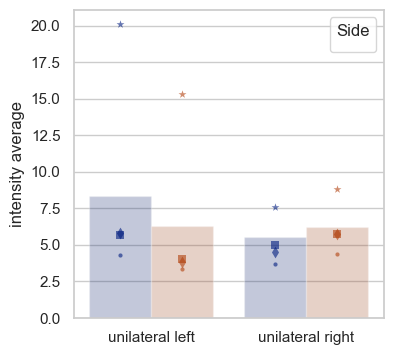

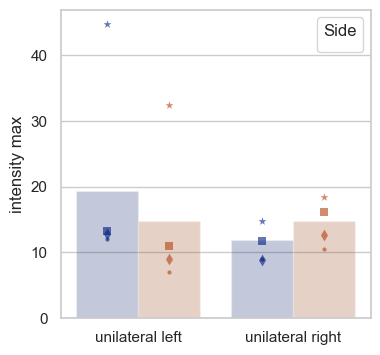

In [20]:
plot_barscatter(df_i_long, "intensity average", "ROItarget_avg")
plot_barscatter(df_i_long, "intensity max", "ROItarget_max")
# plot_barscatter(df_p_long, "pressure average", "ROItarget_avg")
# plot_barscatter(df_p_long, "pressure max", "ROItarget_max")